In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-sales-data/Auto Sales data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[13,6]

In [3]:
df=pd.read_csv('/kaggle/input/auto-sales-data/Auto Sales data.csv')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.shape

(2747, 20)

In [5]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [7]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1843
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

In [8]:
df=df.drop(['POSTALCODE','CONTACTLASTNAME', 'CONTACTFIRSTNAME','ORDERNUMBER','PHONE', 'ADDRESSLINE1','POSTALCODE'],axis=1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


In [9]:
df.nunique()

QUANTITYORDERED           58
PRICEEACH               1843
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
CITY                      71
COUNTRY                   19
DEALSIZE                   3
dtype: int64

In [10]:
len(df.columns)

14

In [11]:
df.select_dtypes(include=np.number).columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES',
       'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object')

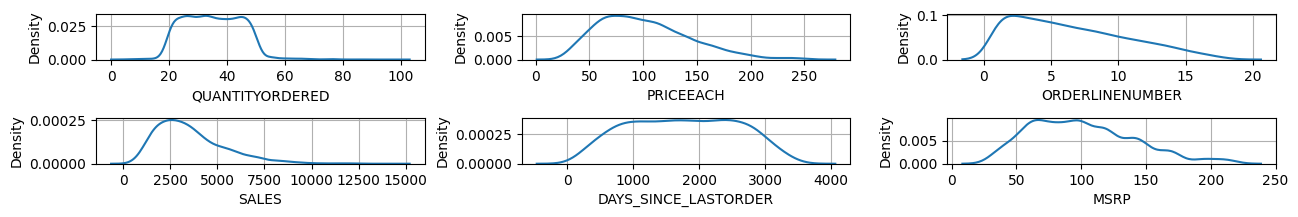

In [12]:
r=6
c=3
it=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(r,c,it)
    sns.kdeplot(df[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

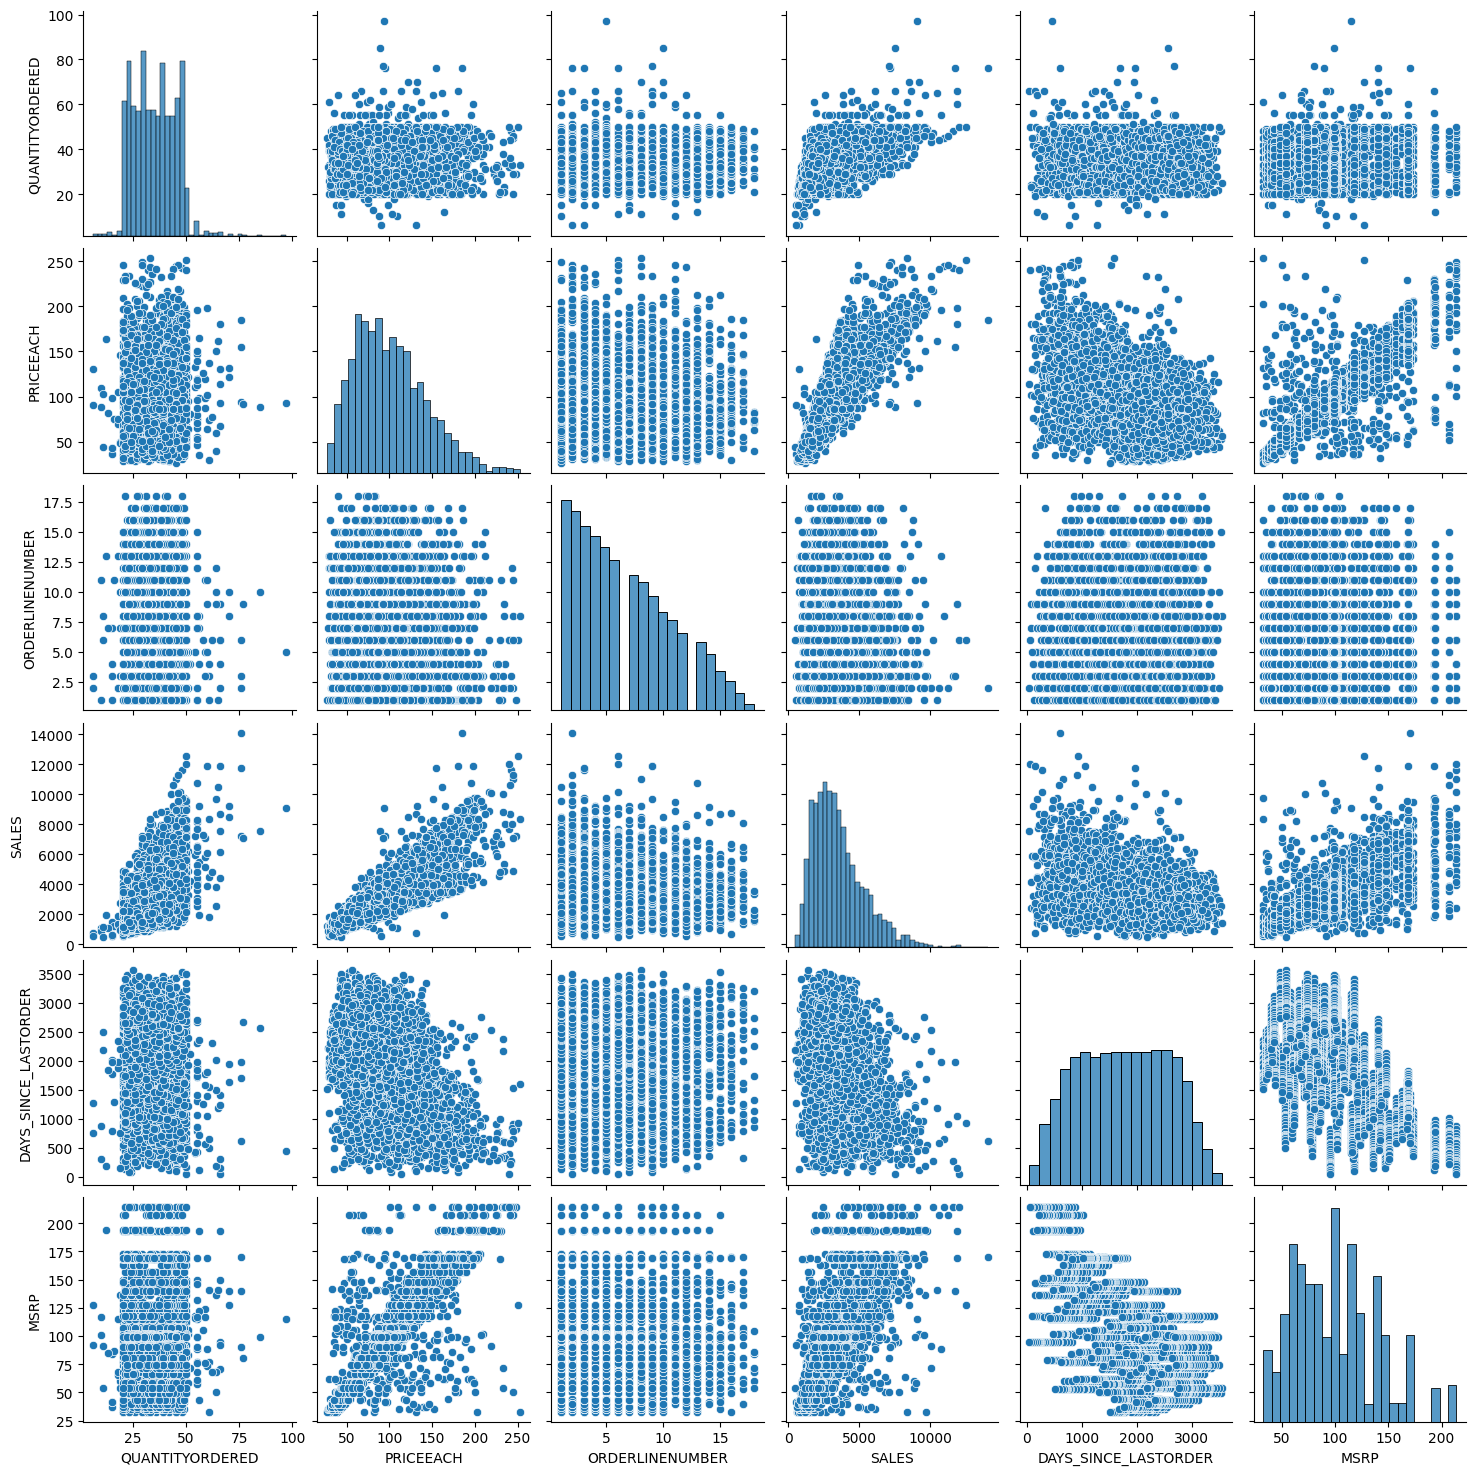

In [13]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.grid()
plt.show()

In [14]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [15]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


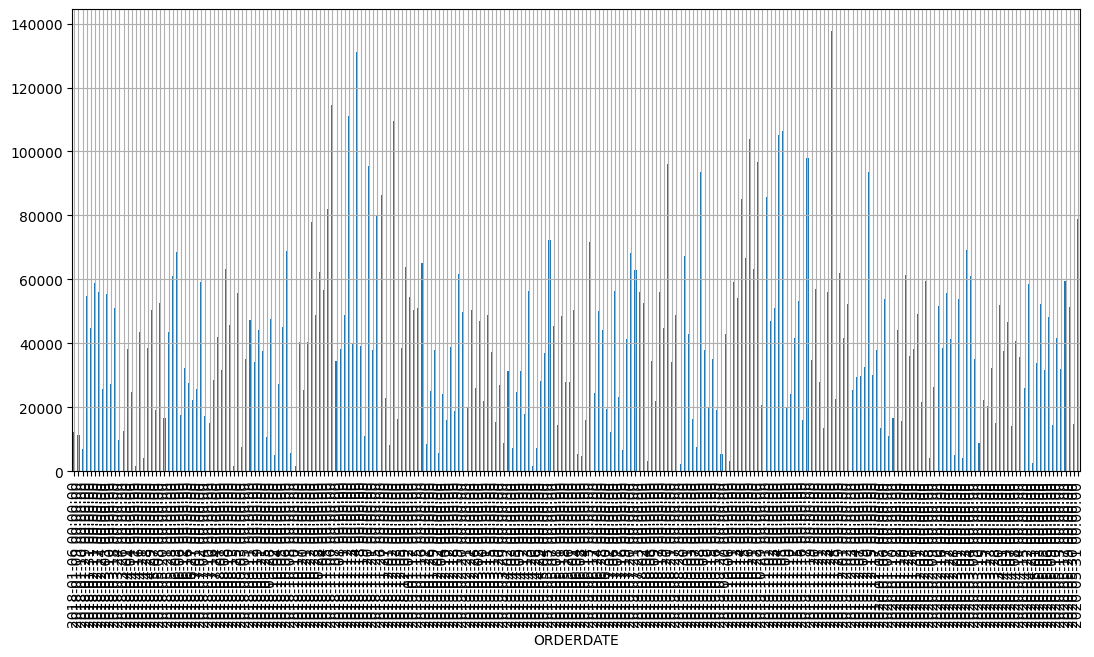

In [16]:
df.groupby('ORDERDATE')['SALES'].sum().plot(kind='bar')
plt.grid()
plt.show()

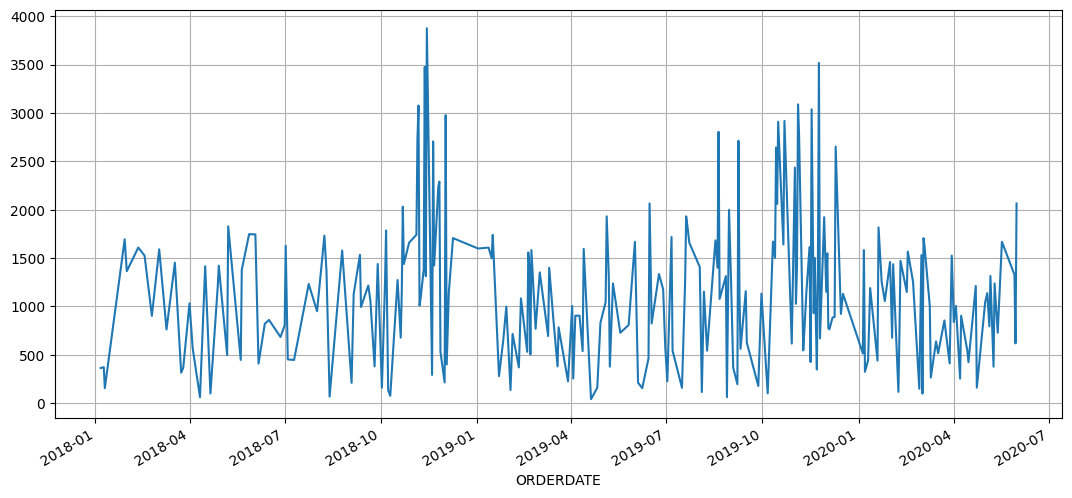

In [17]:
df.groupby('ORDERDATE')['MSRP'].sum().plot(kind='line')
plt.grid()
plt.show()

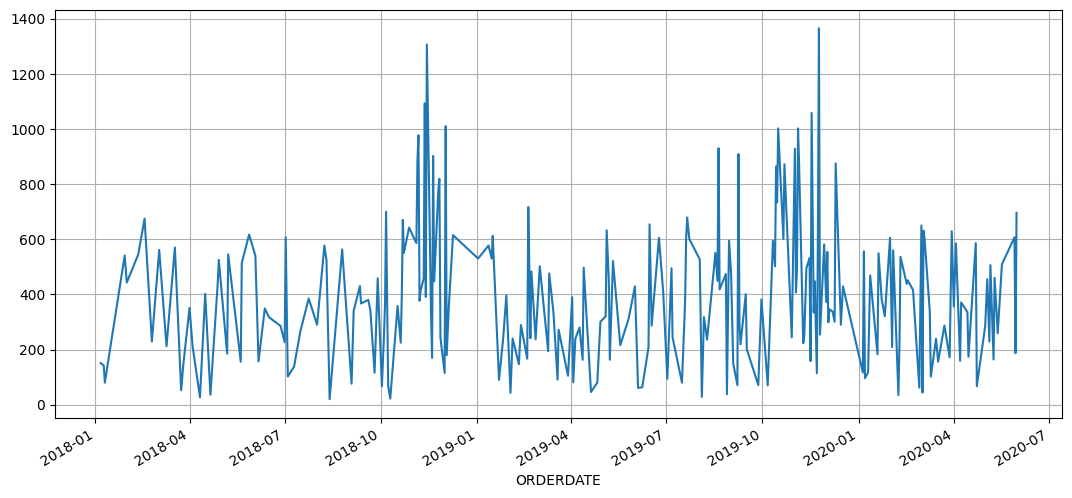

In [18]:
df.groupby('ORDERDATE')['QUANTITYORDERED'].sum().plot(kind='line')
plt.grid()
plt.show()

In [19]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


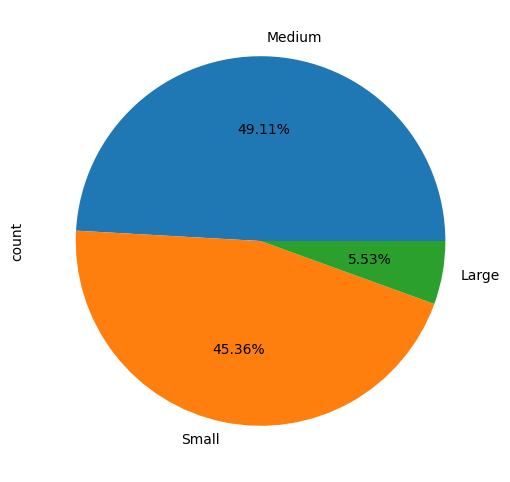

In [20]:
df['DEALSIZE'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

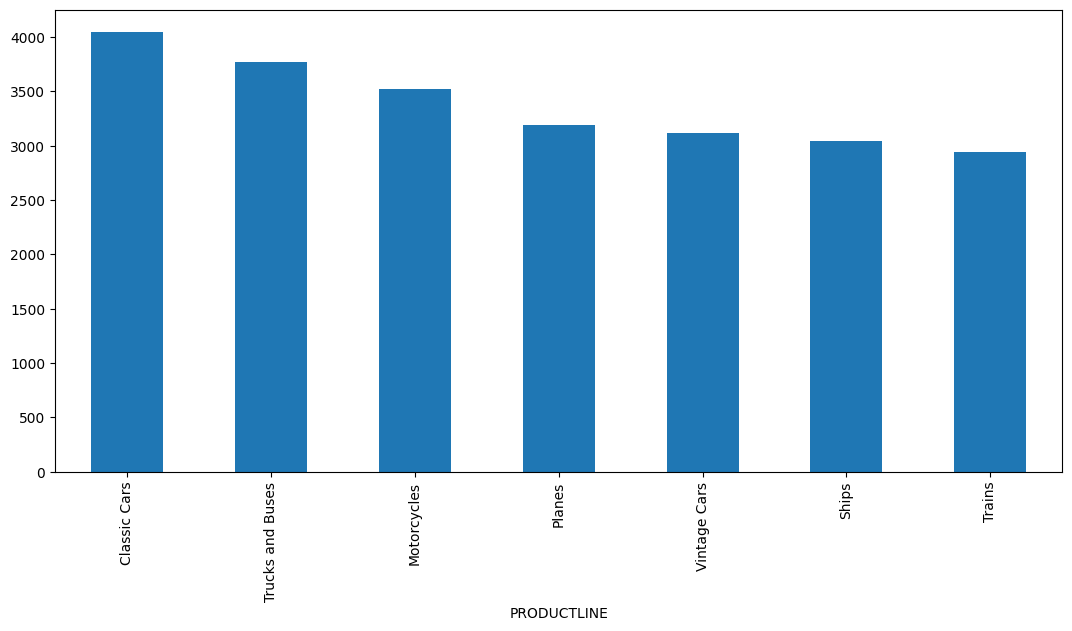

In [21]:
df.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

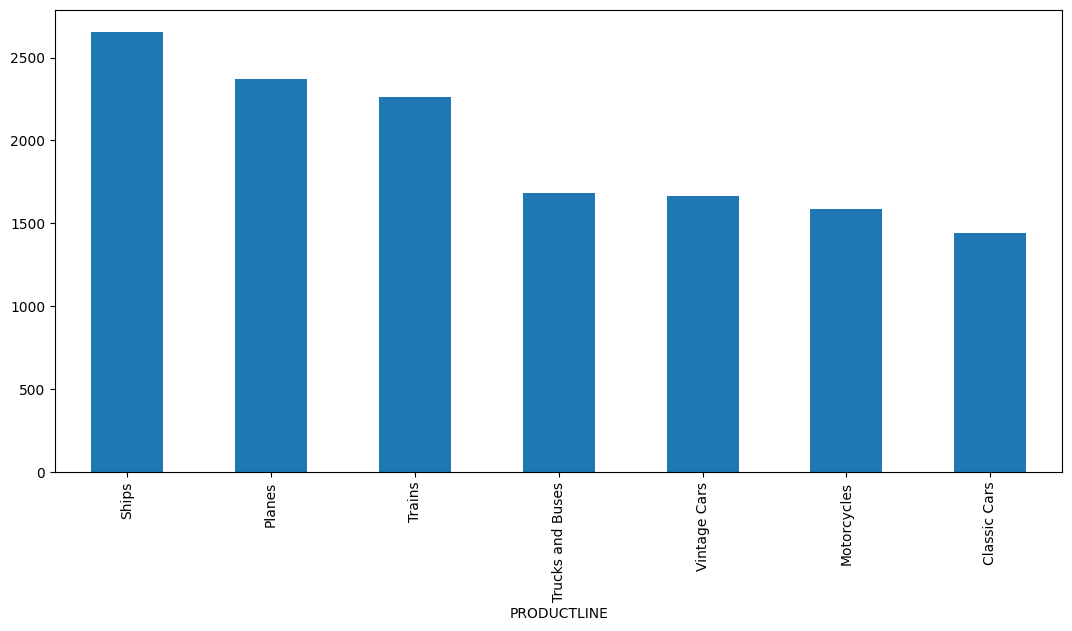

In [22]:
df.groupby('PRODUCTLINE')['DAYS_SINCE_LASTORDER'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [23]:
df['PRODUCTCODE'].unique()

array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

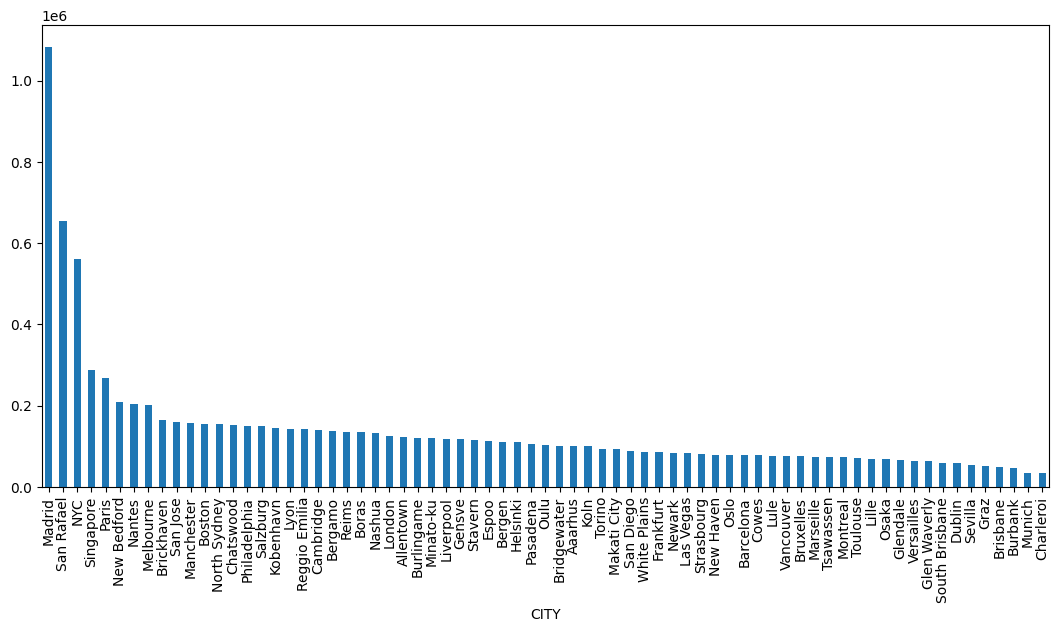

In [24]:
df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

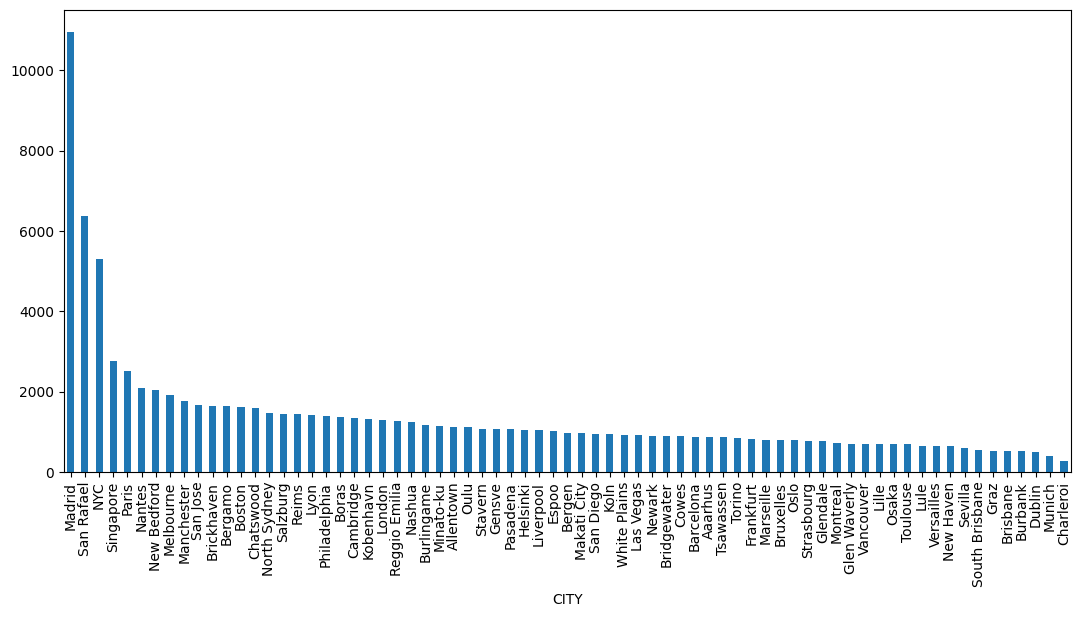

In [25]:
df.groupby('CITY')['QUANTITYORDERED'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

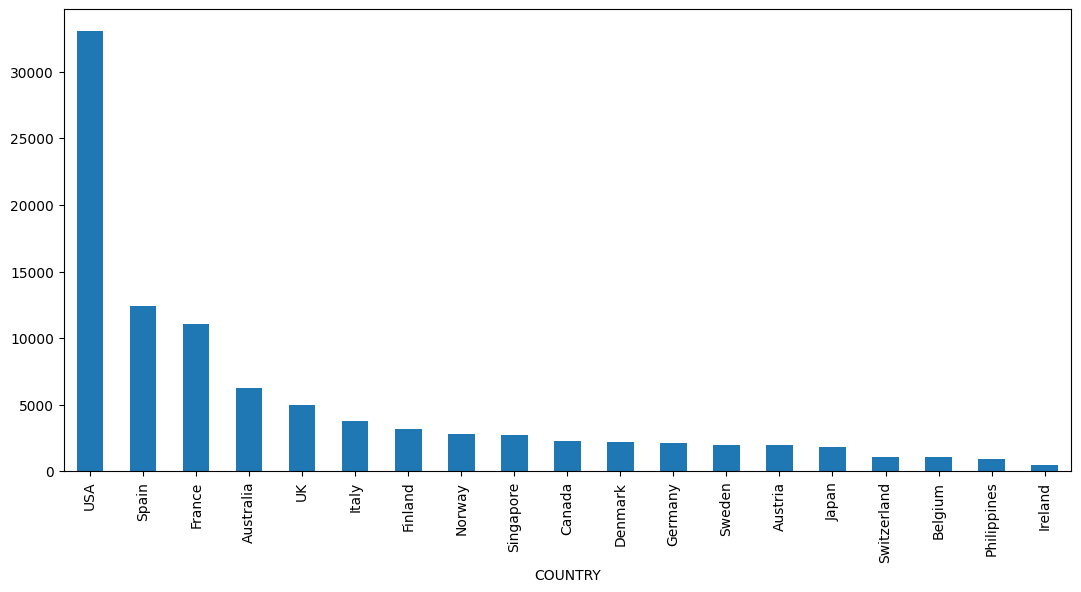

In [26]:
df.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

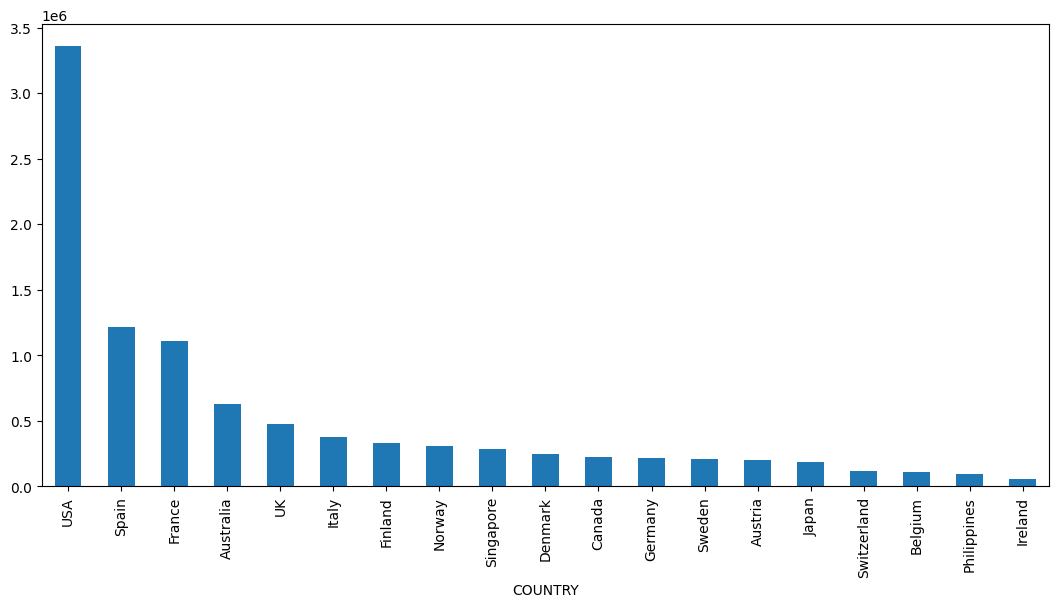

In [27]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

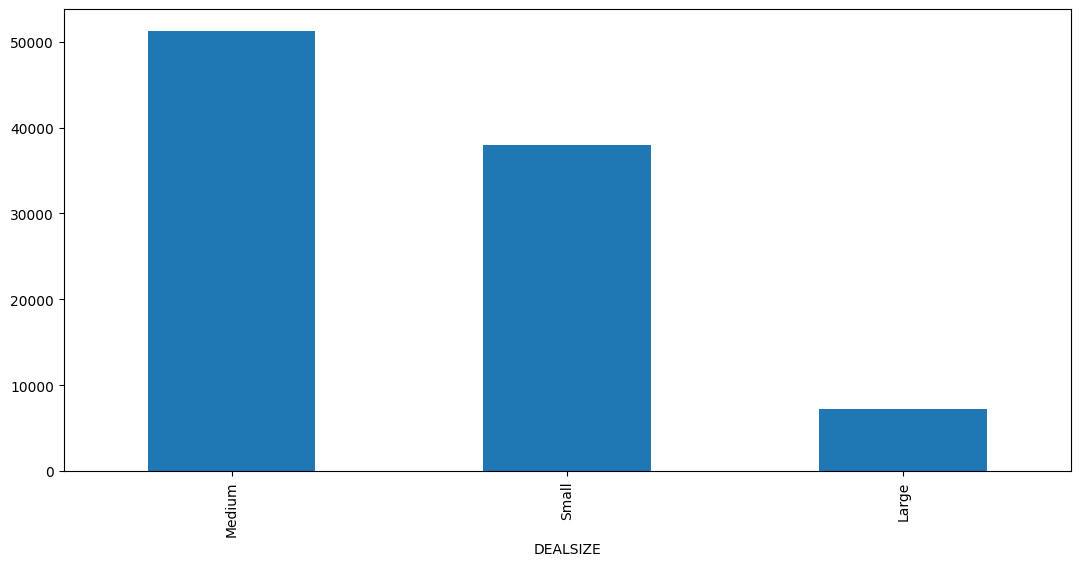

In [28]:
df.groupby('DEALSIZE')['QUANTITYORDERED'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

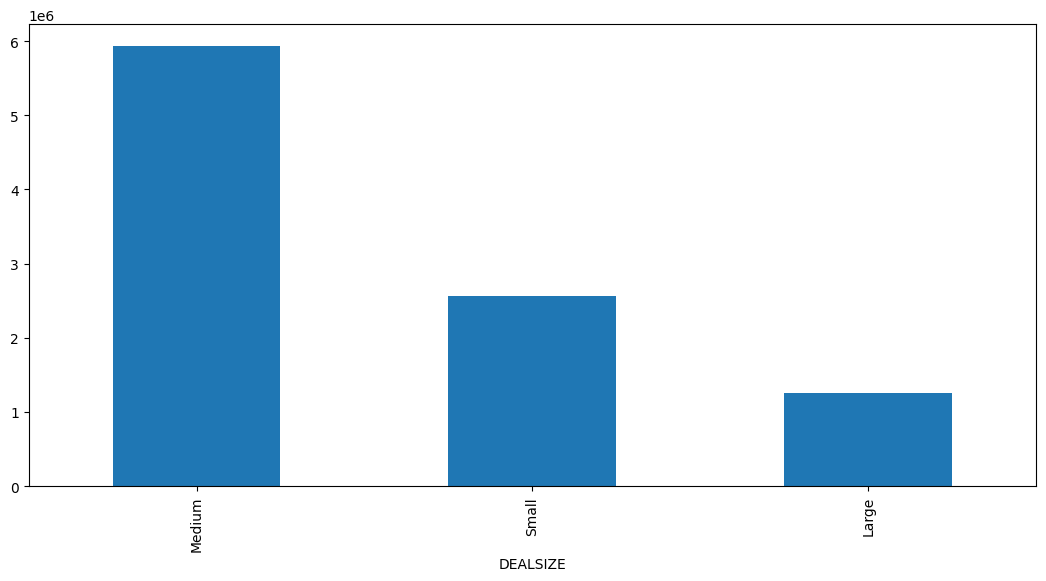

In [29]:
df.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

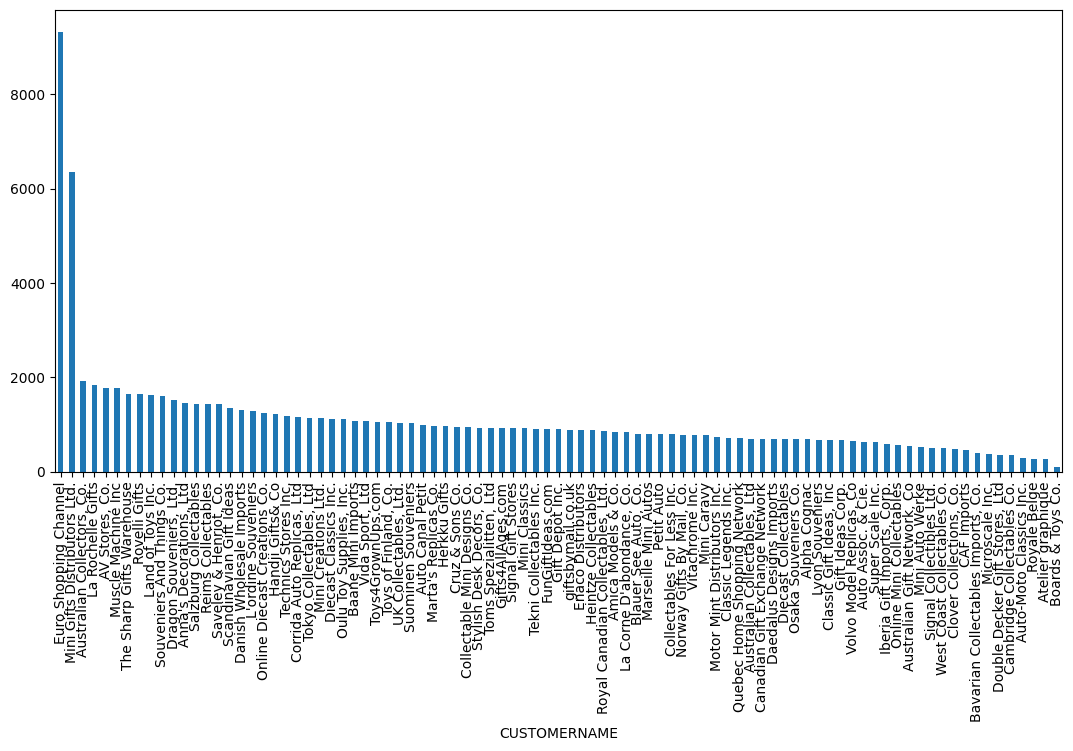

In [30]:
df.groupby('CUSTOMERNAME')['QUANTITYORDERED'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()


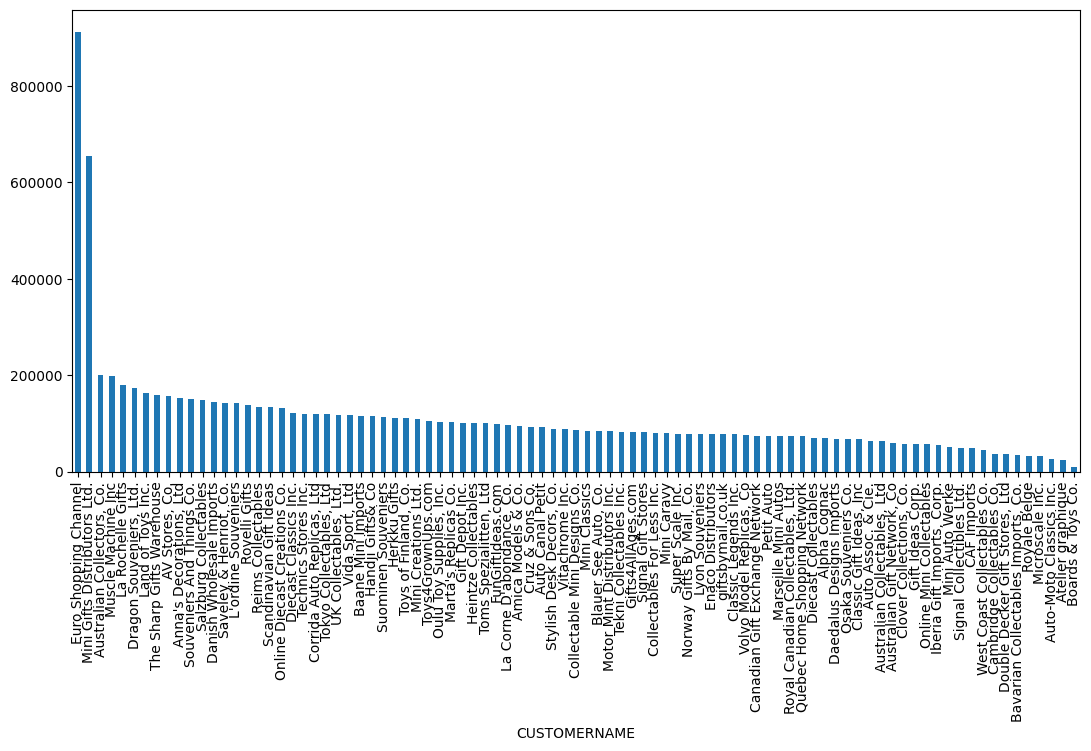

In [31]:
df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [32]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium


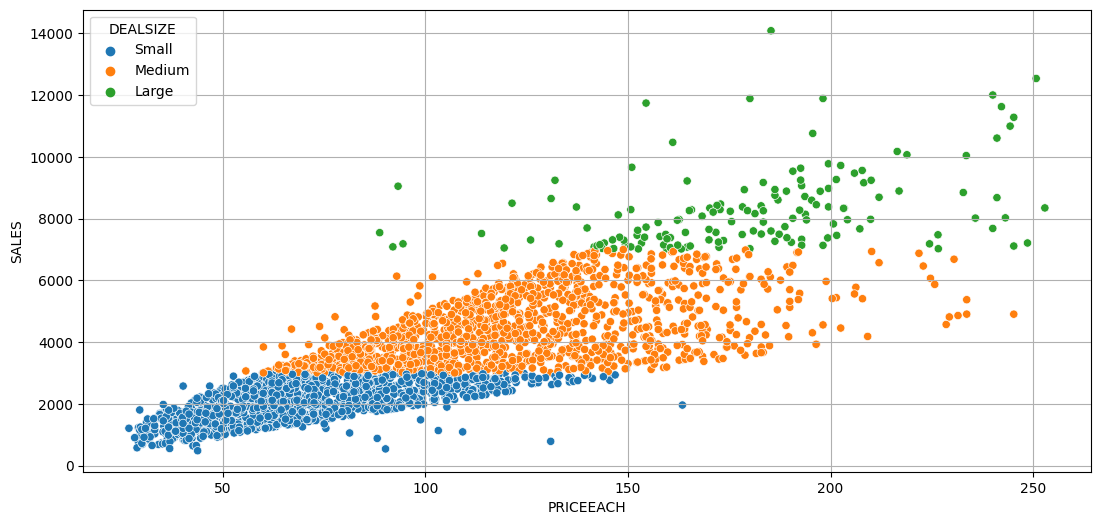

In [33]:
sns.scatterplot(x='PRICEEACH',y='SALES',data=df,hue='DEALSIZE')
plt.grid()
plt.show()

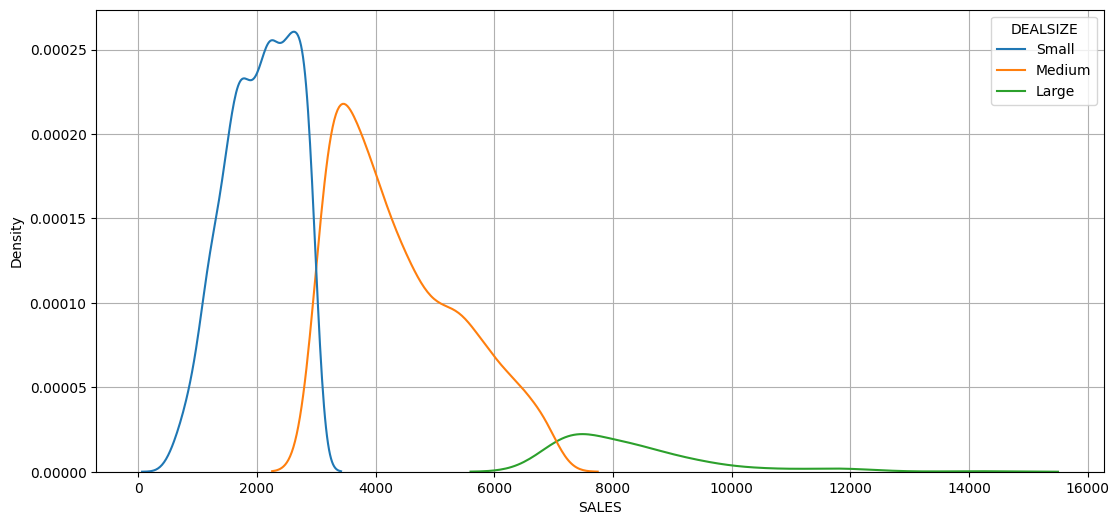

In [34]:
sns.kdeplot(x='SALES',data=df,hue='DEALSIZE')
plt.grid()
plt.show()

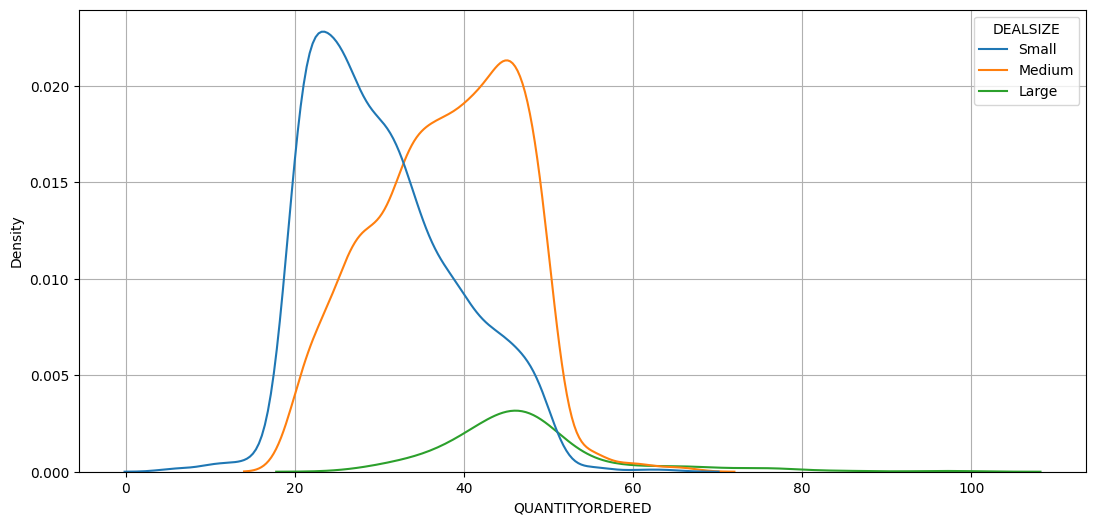

In [35]:
sns.kdeplot(x='QUANTITYORDERED',data=df,hue='DEALSIZE')
plt.grid()
plt.show()

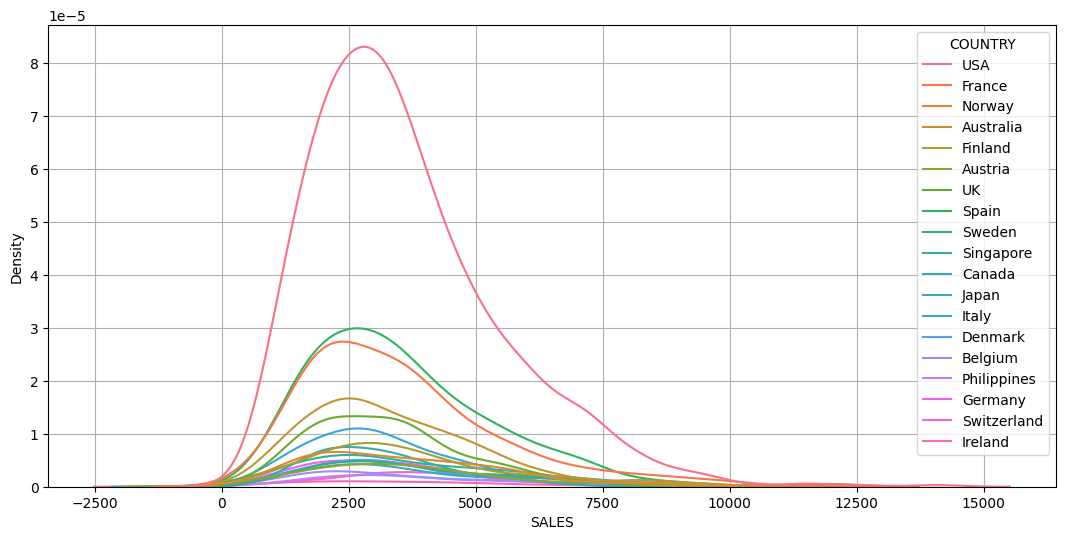

In [36]:
sns.kdeplot(x='SALES',data=df,hue='COUNTRY')
plt.grid()
plt.show()